In [ ]:
import os, shutil
from keras import models , optimizers, layers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd


original_dataset_dir = '/content/drive/MyDrive/dogsandcats'
base_dir = 'modelInput'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
test_dir = os.path.join(base_dir,'test')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
if os.path.exists(base_dir)==False:
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(test_dir)
    os.mkdir(validation_dir)
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)

In [ ]:
# Define a training, validation, and testing data generators.
fname = ['cats/{}.jpg'.format(i) for i in range(1250)] #Training set cat
for i,f in enumerate(fname):                                            
    src = os.path.join(original_dataset_dir,f)
    dst = os.path.join(train_cats_dir,'{}.jpg'.format(i))
    if os.path.exists(dst)==False and os.path.exists(src):
        shutil.copyfile(src,dst)
    
fnames = ['cats/{}.jpg'.format(i) for i in range(1250,1750)] #Validation set cat
for i,f in enumerate(fnames,start=1250):
    src = os.path.join(original_dataset_dir,f)
    dst = os.path.join(validation_cats_dir,'{}.jpg'.format(i))
    if os.path.exists(dst)==False and os.path.exists(src):
        shutil.copyfile(src,dst)

fnames = ['cats/{}.jpg'.format(i) for i in range(1750,2000)] #Test set cat
for i,f in enumerate(fnames,start=1750):
    src = os.path.join(original_dataset_dir,f)
    dst = os.path.join(test_cats_dir,'{}.jpg'.format(i))
    if os.path.exists(dst)==False and os.path.exists(src):
        shutil.copyfile(src,dst)
    
fnames = ['dogs/{}.jpg'.format(i) for i in range(1250)] #Training set dog
for i,f in enumerate(fnames):
    src = os.path.join(original_dataset_dir,f)
    dst = os.path.join(train_dogs_dir,'{}.jpg'.format(i))
    if os.path.exists(dst)==False and os.path.exists(src):
        shutil.copyfile(src,dst)
    
fnames = ['dogs/{}.jpg'.format(i) for i in range(1250,1750)] #Validation set dog
for i,f in enumerate(fnames,start=1250):
    src = os.path.join(original_dataset_dir,f)
    dst = os.path.join(validation_dogs_dir,'{}.jpg'.format(i))
    if os.path.exists(dst)==False and os.path.exists(src):
        shutil.copyfile(src,dst)

fnames = ['dogs/{}.jpg'.format(i) for i in range(1750,2000)] #Test set dog
for i,f in enumerate(fnames,start=1750):
    src = os.path.join(original_dataset_dir,f)
    dst = os.path.join(test_dogs_dir,'{}.jpg'.format(i))
    if os.path.exists(dst)==False and os.path.exists(src):
        shutil.copyfile(src,dst)

In [ ]:
# Data functions
def GetDatagen():
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_datagen = ImageDataGenerator(rescale=1./255)
    return train_datagen,test_datagen

def getTestdata():
    test_datagen = ImageDataGenerator()
    test_data = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
    return test_data
    
def Generator_without_Augmentation():
    train_datagen,val_datagen = GetDatagen()  
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

    validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')
    return train_generator,validation_generator

def GetAgumentedDatagen():
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
    val_datagen = ImageDataGenerator(rescale=1./255)
    return train_datagen,val_datagen

def Generator_with_AugmentedDatagen():
    train_datagen,val_datagen = GetAgumentedDatagen()  
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')
    validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
    return train_generator,validation_generator



In [ ]:
# Visualizing the model's training
def PlotGraph(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1,len(acc) + 1)
    plt.plot(epochs,acc,'r',label='training accuracy')
    plt.plot(epochs,val_acc,'b',label='validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs,loss,'r',label='training loss')
    plt.plot(epochs,val_loss,'b',label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.figure()
    plt.show()

In [28]:
# Defining the models
def Model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
    return model


def VGG16FrozenNetwork():
    conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape=(150,150,3))
    conv_base.trainable = False
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(optimizer="rmsprop",loss='binary_crossentropy',metrics=['acc'])
    return model

def VGG16finetuned():
    conv_base.trainable = False
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == "block5_conv1":
          set_trainable = True
        if set_trainable:
          layer.trainable = True
        else:
          layer.trainable = False
    model.summary()
    model.compile(optimizer=optimizers.Adam(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])
    return model

Found 2500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
____________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 9s 167ms/step - loss: 1.5332 - acc: 0.5931 - val_loss: 0.6878 - val_acc: 0.6250
Epoch 2/30
50/50 [==============================] - 8s 155ms/step - loss: 0.6029 - acc: 0.6939 - val_loss: 0.6818 - val_acc: 0.5000
Epoch 3/30
50/50 [==============================] - 8s 157ms/step - loss: 0.5608 - acc: 0.7258 - val_loss: 0.6800 - val_acc: 0.5010
Epoch 4/30
50/50 [==============================] - 8s 159ms/step - loss: 0.5206 - acc: 0.7435 - val_loss: 0.6888 - val_acc: 0.4969
Epoch 5/30
50/50 [==============================] - 8s 160ms/step - loss: 0.5117 - acc: 0.7602 - val_loss: 0.6876 - val_acc: 0.5021
Epoch 6/30
50/50 [==============================] - 8s 157ms/step - loss: 0.4490 - acc: 0.7952 - val_loss: 0.6761 - val_acc: 0.5021
Epoch 7/30
50/50 [==============================] - 8s 158ms/step - loss: 0.4372 - acc: 0.8006 - val_loss: 0.6176 - val_acc: 0.5490
Epoch 8/30
50/50 [==============================] - 8s 157ms/step - loss: 0.4163 - acc:

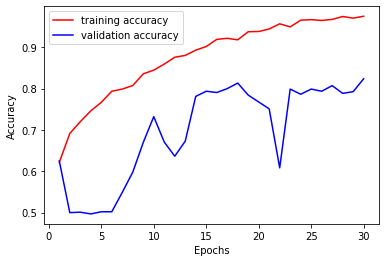

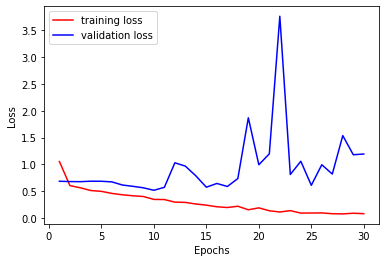

<Figure size 432x288 with 0 Axes>

In [ ]:
EPOCHS = 30
N = 50
M = 30
train_generator,validiation_generator = Generator_without_Augmentation()
model1 = Model()
model1.summary()
history1 = model1.fit_generator(train_generator,
                                steps_per_epoch=N,
                                epochs=EPOCHS,
                                validation_data=validiation_generator,
                                validation_steps=M)
PlotGraph(history1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
__________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 9s 167ms/step - loss: 1.5013 - acc: 0.6939 - val_loss: 0.2848 - val_acc: 0.8813
Epoch 2/30
50/50 [==============================] - 8s 163ms/step - loss: 0.3026 - acc: 0.8733 - val_loss: 0.4820 - val_acc: 0.7865
Epoch 3/30
50/50 [==============================] - 8s 161ms/step - loss: 0.3308 - acc: 0.8644 - val_loss: 0.2375 - val_acc: 0.8885
Epoch 4/30
50/50 [==============================] - 8s 160ms/step - loss: 0.2365 - acc: 0.9045 - val_loss: 0.2615 - val_acc: 0.8823
Epoch 5/30
50/50 [==============================] - 8s 163ms/step - loss: 0.2297 - acc: 0.9050 - val_loss: 0.2402 - val_acc: 0.8938
Epoch 6/30
50/50 [==============================] - 8s 160ms/step - loss: 0.1903 - acc: 0.9229 - val_loss: 0.2787 - val_acc: 0.8865
Epoch 7/30
50/50 [==============================] - 8s 163ms/step - loss: 0.1823 - acc: 0.9243 - val_loss: 0.4812 - val_acc: 0.8229
Epoch 8/30
50/50 [==============================] - 8s 159ms/step - loss: 0.

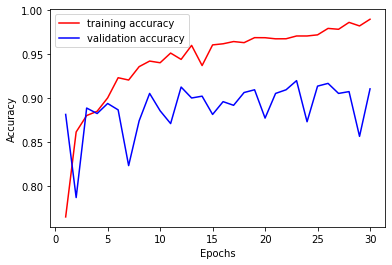

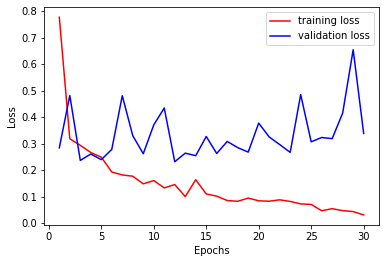

<Figure size 432x288 with 0 Axes>

In [ ]:
model2 = VGG16FrozenNetwork()
train_datagen,val_datagen = GetDatagen()
train_generator, validation_generator = Generator_without_Augmentation()
history2 = model2.fit_generator(train_generator,
                      steps_per_epoch=N,
                      epochs=EPOCHS,
                      validation_data=validation_generator,
                      validation_steps=M)

PlotGraph(history2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
__________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 14s 269ms/step - loss: 0.7944 - acc: 0.8228 - val_loss: 0.3208 - val_acc: 0.8933
Epoch 2/30
50/50 [==============================] - 13s 261ms/step - loss: 0.4747 - acc: 0.8554 - val_loss: 0.3241 - val_acc: 0.9117
Epoch 3/30
50/50 [==============================] - 13s 265ms/step - loss: 0.4552 - acc: 0.8506 - val_loss: 0.2302 - val_acc: 0.9183
Epoch 4/30
50/50 [==============================] - 13s 268ms/step - loss: 0.3957 - acc: 0.8652 - val_loss: 0.3048 - val_acc: 0.8983
Epoch 5/30
50/50 [==============================] - 13s 261ms/step - loss: 0.3766 - acc: 0.8570 - val_loss: 0.2116 - val_acc: 0.9067
Epoch 6/30
50/50 [==============================] - 13s 264ms/step - loss: 0.3902 - acc: 0.8481 - val_loss: 0.2582 - val_acc: 0.8933
Epoch 7/30
50/50 [==============================] - 13s 261ms/step - loss: 0.3694 - acc: 0.8477 - val_loss: 0.2434 - val_acc: 0.9133
Epoch 8/30
50/50 [==============================] - 13s 265ms/step - 

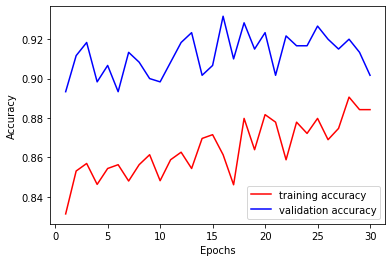

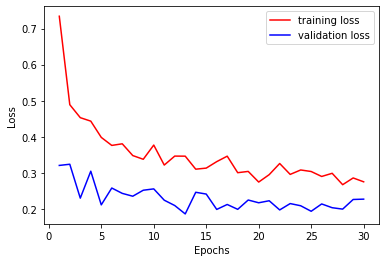

<Figure size 432x288 with 0 Axes>

In [30]:
model = model2
model3 = VGG16finetuned()
train_datagen,test_datagen = GetDatagen()  
train_generator,validation_generator  = Generator_with_AugmentedDatagen()
history3 = model3.fit_generator(train_generator,
                      steps_per_epoch=N,
                      epochs=EPOCHS,
                      validation_data=validation_generator,
                      validation_steps=M)

PlotGraph(history3)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_16 (Flatten)         (None, 8192)              0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 10s 187ms/step - loss: 2.1560 - acc: 0.5828 - val_loss: 0.6712 - val_acc: 0.6700
Epoch 2/30
50/50 [==============================] - 9s 187ms/step - loss: 0.5435 - acc: 0.7309 - val_loss: 0.4140 - val_acc: 0.8033
Epoch 3/30
50/50 [==============================] - 9s 184ms/step - loss: 0.4451 - acc: 0.7872 - val_loss: 0.2453 - val_acc: 0.8983
Epoch 4/30
50/50 [==============================] - 9s 186ms/step - loss: 0.4256 - acc: 0.8009 - val_loss: 0.2510 - val_acc: 0.8817
Epoch 5/30
50/50 [==============================] - 9s 185ms/step - loss: 0.4085 - acc: 0.8455 - val_loss: 0.2263 - val_acc: 0.9067
Epoch 6/30
50/50 [==============================] - 9s 183ms/step - loss: 0.4414 - acc: 0.7975 - val_loss: 0.2717 - val_acc: 0.8833
Epoch 7/30
50/50 [==============================] - 9s 184ms/step - loss: 0.4061 - acc: 0.8327 - val_loss: 0.3385 - val_acc: 0.8617
Epoch 8/30
50/50 [==============================] - 9s 182ms/step - loss: 0

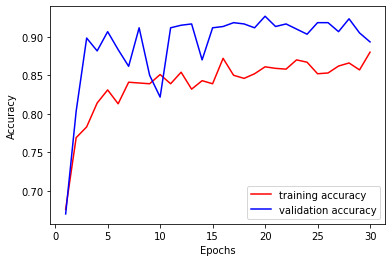

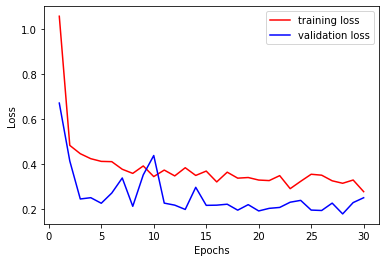

<Figure size 432x288 with 0 Axes>

In [ ]:
model4 = VGG16FrozenNetwork()
train_datagen,test_datagen = GetAgumentedDatagen()  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

history4 = model4.fit_generator(train_generator,
                      steps_per_epoch=N,
                      epochs=EPOCHS,
                      validation_data=validation_generator,
                      validation_steps=M)

PlotGraph(history4)

In [31]:
df = pd.DataFrame()
df["Model1"] = history1.history["val_acc"]
df["Model2"] = history2.history["val_acc"]
df["Model3"] = history3.history["val_acc"]
df["Model4"] = history4.history["val_acc"]
arr= []
for i in range(EPOCHS-1):
    if i % 5 != 0:
      arr.append(i)
df = df.drop(arr)
df = df.style.highlight_max(color = 'lightgreen', axis = 1)
df

,Model1,Model2,Model3,Model4
0,0.625000,0.881250,0.893333,0.670000
5,0.502083,0.886458,0.893333,0.883333
10,0.670833,0.870833,0.908333,0.911667
15,0.790625,0.895833,0.931667,0.913333
20,0.751042,0.905208,0.901667,0.913333
25,0.793750,0.916667,0.920000,0.918333
29,0.823958,0.910417,0.901667,0.893333


In [33]:
test = getTestdata()
test_loss1, test_acc1 = model1.evaluate_generator(test)
test_loss2, test_acc2 = model2.evaluate_generator(test)
test_loss3, test_acc3 = model3.evaluate_generator(test)
test_loss4, test_acc4 = model4.evaluate_generator(test)
print("Test acc for model1: {}%".format(test_acc1))
print("Test acc for model2: {}%".format(test_acc2))
print("Test acc for model3: {}%".format(test_acc3))
print("Test acc for model4: {}%".format(test_acc4))

Found 500 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test acc for model1: 0.5699999928474426%
Test acc for model2: 0.878000020980835%
Test acc for model3: 0.878000020980835%
Test acc for model4: 0.8420000076293945%
